<a href="https://colab.research.google.com/github/powersurge8891/Dimension-Reduction/blob/main/Manifold_Learning_(t_SNE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data and libraries

In [1]:
%cd /content/drive/MyDrive/Data Mining for Business in Python/5. Dimension Reduction

/content/drive/MyDrive/Data Mining for Business in Python/5. Dimension Reduction


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
data=pd.read_csv('abalone-challenge.csv')
data.head()

,Sex,Lenght,Diameter,Height,Whole weight,Shucked Weight,Viscera Weight,Shell Weight,Rings (+1.5=Years)
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#Exploring data

In [4]:
data.isna().sum()

Sex                   0
Lenght                0
Diameter              0
Height                0
Whole weight          0
Shucked Weight        0
Viscera Weight        0
Shell Weight          0
Rings (+1.5=Years)    0
dtype: int64

In [5]:
data.Sex= pd.get_dummies(data.Sex, drop_first=True)

In [6]:
data.sample(3)

,Sex,Lenght,Diameter,Height,Whole weight,Shucked Weight,Viscera Weight,Shell Weight,Rings (+1.5=Years)
1315,1,0.55,0.425,0.135,0.7305,0.3325,0.1545,0.215,9
1977,0,0.70,0.575,0.205,1.7730,0.6050,0.4470,0.538,13
3783,1,0.62,0.480,0.180,1.1305,0.5285,0.2655,0.306,12


In [7]:
data.rename(columns={'Rings (+1.5=Years)': 'Age'}, inplace=True)

In [8]:
data

,Sex,Lenght,Diameter,Height,Whole weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


###correlation matrix

In [9]:
import seaborn as sns

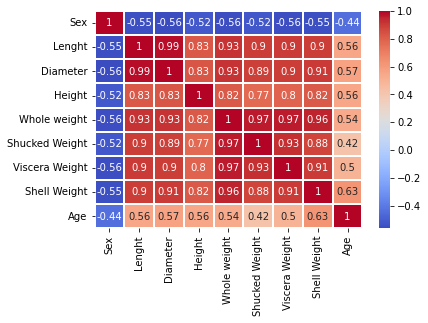

In [10]:
sns.heatmap(data.corr(),cmap='coolwarm',annot=True, linewidths=1)

#Manifold Learning

In [12]:
X= data.drop(columns="Age")

In [13]:
from sklearn.manifold import  TSNE
model= TSNE(n_components=2, random_state= 404)

In [14]:
componenents = model.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


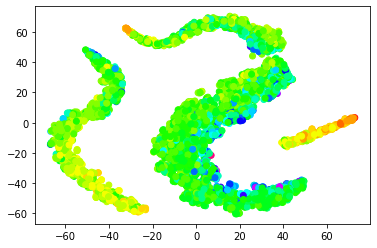

In [17]:
plt.scatter(componenents[:, 0],
         componenents[:, 1],
         cmap= 'hsv',
         c= data["Age"]
         )
